In [1]:
from pylab import *
import os
import pandas as pd
from transforms3d.quaternions import quat2mat,qmult,qnorm,mat2quat 

In [2]:
datapath="./logs/3/csv/DATA"
data=pd.read_pickle(datapath)
# data.to_csv('data_vol_1.csv')

In [3]:
data

,t,roll,pitch,yaw,R,manual_x,manual_y,manual_z,manual_r,rc_0,...,accelero_x,accelero_y,accelero_z,airspeed_mes,baro,mag_x,mag_y,mag_z,init_timestamp,dt
0,0.000000,-0.042915,0.089629,0.885746,"[0.6301726066495162, -0.776103644049531, 0.023...",0.000000,0.050919,0.992745,0.041614,1512.0,...,0.879420,0.410611,-9.720865,-2.251545,148.839220,0.025939,-0.074423,0.407569,34618631.0,0.004112
1,0.004112,-0.042917,0.089633,0.885749,"[0.6301697599107068, -0.7761059292987144, 0.02...",0.000000,0.050919,0.992745,0.041614,1512.0,...,0.874686,0.432140,-9.726557,-2.249309,148.908197,0.025064,-0.080195,0.405909,34618631.0,0.004055
2,0.008167,-0.042926,0.089634,0.885746,"[0.6301718132860987, -0.7761044395362349, 0.02...",0.000000,0.050919,0.992745,0.041614,1512.0,...,0.880387,0.415386,-9.711324,-2.245253,148.997788,0.023972,-0.087398,0.403836,34618631.0,0.003771
3,0.011938,-0.042933,0.089637,0.885747,"[0.630171413946625, -0.7761048647695097, 0.023...",0.000000,0.050925,0.992748,0.041620,1512.0,...,0.885258,0.405136,-9.702778,-2.241482,149.081104,0.022956,-0.094098,0.401908,34618631.0,0.004085
4,0.016023,-0.042929,0.089642,0.885752,"[0.6301669059863768, -0.7761083701999525, 0.02...",0.000000,0.050935,0.992753,0.041630,1512.0,...,0.878322,0.414211,-9.673909,-2.238217,149.043993,0.023055,-0.092993,0.401413,34618631.0,0.003959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61755,262.778774,-1.217677,-0.310556,2.257652,"[-0.6037757103890133, -0.44922800817058384, -0...",0.000030,0.433255,0.132530,0.041795,1513.0,...,-1.014635,-1.355005,4.520801,21.596846,338.571214,-0.215579,-0.296254,0.167457,34618631.0,0.004026
61756,262.782800,-1.216144,-0.309087,2.258737,"[-0.6048585639995174, -0.4494050602815483, -0....",0.000027,0.436681,0.132530,0.041415,1513.0,...,0.183202,-1.856151,1.930392,21.594016,338.539929,-0.210673,-0.299278,0.168950,34618631.0,0.003966
61757,262.786766,-1.214493,-0.307732,2.260136,"[-0.6061490116958125, -0.44971757807690865, -0...",0.000025,0.440055,0.132530,0.041040,1513.0,...,-1.070773,-0.829503,2.627742,21.591171,338.509111,-0.202793,-0.305113,0.171086,34618631.0,0.003247
61758,262.790013,-1.213182,-0.306547,2.261070,"[-0.6070635477508705, -0.4499002834582015, -0....",0.000022,0.442818,0.132530,0.040733,1513.0,...,0.438167,-1.845583,4.595330,21.588841,338.483879,-0.196341,-0.309889,0.172836,34618631.0,0.003945


In [4]:
data.describe()

,t,roll,pitch,yaw,manual_x,manual_y,manual_z,manual_r,rc_0,rc_1,...,accelero_x,accelero_y,accelero_z,airspeed_mes,baro,mag_x,mag_y,mag_z,init_timestamp,dt
count,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,...,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.000000,61760.0,61760.000000
mean,131.552995,0.002828,0.113933,0.703763,0.030710,0.067540,0.624623,0.051829,1497.195062,1546.706003,...,1.142623,-0.044182,-9.911695,6.602866,200.367075,-0.090955,-0.024359,0.293661,34618631.0,0.000000
std,75.968624,0.326532,0.125383,0.956539,0.064488,0.142598,0.461027,0.067413,29.201315,27.667070,...,1.142779,1.514225,2.098347,11.806511,82.085604,0.167604,0.136831,0.149343,0.0,1.057538
min,0.000000,-1.232059,-0.359952,-3.141360,-0.330767,-0.942557,0.000000,-0.065256,1305.034571,1482.021768,...,-3.114430,-14.341085,-23.484982,-3.226752,146.389790,-0.647947,-0.395888,-0.306815,34618631.0,-262.793958
25%,65.015903,-0.044372,0.087504,0.891542,0.000000,0.050059,0.000000,0.040603,1485.328826,1542.660637,...,0.857659,0.114374,-9.727158,-1.989488,148.877603,-0.186758,-0.084726,0.163945,34618631.0,0.003935
50%,131.973343,-0.043356,0.088274,0.917259,0.000000,0.050974,0.992765,0.041667,1512.000000,1543.000000,...,0.871895,0.416267,-9.694776,-1.691085,149.092880,0.011042,-0.079688,0.392070,34618631.0,0.004000
75%,197.982172,-0.040824,0.089568,0.926963,0.045199,0.052120,0.992777,0.042679,1512.000000,1543.520551,...,1.175000,0.434517,-9.672429,21.750153,254.370583,0.017183,-0.043292,0.398249,34618631.0,0.004056
max,262.793958,1.299447,0.593621,3.137516,0.490822,1.000000,0.994011,0.867793,1657.940238,1878.974271,...,12.621195,20.483744,6.466262,28.647694,385.122049,0.074849,0.550320,0.476515,34618631.0,1.008707


Integrating only with gyro:

In [5]:
data.keys()

Index(['t', 'roll', 'pitch', 'yaw', 'R', 'manual_x', 'manual_y', 'manual_z',
       'manual_r', 'rc_0', 'rc_1', 'rc_2', 'rc_3', 'rc_4', 'rc_5', 'rc_6',
       'rc_7', 'ax_iner', 'ay_iner', 'az_iner', 'vx_iner', 'vy_iner',
       'vz_iner', 'x_iner', 'y_iner', 'z_iner', 'v_gps_north', 'v_gps_east',
       'v_gps_down', 'alt', 'gyro_x', 'gyro_y', 'gyro_z', 'accelero_x',
       'accelero_y', 'accelero_z', 'airspeed_mes', 'baro', 'mag_x', 'mag_y',
       'mag_z', 'init_timestamp', 'dt'],
      dtype='object')

In [6]:


    
def skew(x):
    return array([[0,-x[2],x[1]],
                 [x[2],0,-x[0]],
                  [-x[1],x[0],0]])

def vect(M):
    if M.shape!=(3,3):
        print("vect argument M has wrong shape")
        return zeros(3)
    return array([M[2,1],M[0,2],M[1,0]])
    
def orthonormalize(M):
    if M.shape!=(3,3):
        print('Bad shape')
        return eye(3) 

    u,v,w=M.T
    if norm(u)==0 or norm(v)==0 or norm(w)==0:
        print("At is one vec is null")

        return eye(3)
    
    u=u/norm(u)
    v=v-dot(u,v)*u
    
    if norm(v)==0:
        "u and v are colinear"
        return eye(3)
    
    v/=norm(v)
    w=cross(u,v)
    
    new_M=array([u,v,w]).T
    return new_M
    
def predict_new_quat(q,omega,dt,k=0.2):
    
    q_omega=r_[0,omega]
    
    dqdt=0.5*qmult(q,q_omega)
    
    new_q=q+dt*dqdt
    
    new_q=mat2quat(orthonormalize(quat2mat(new_q)))
    
    return new_q
    

# Extracting inital values

In [7]:
data_begin=data.loc[data.t<40]

In [8]:
x=data_begin.t
y=array([data_begin['accelero_x'],data_begin['accelero_y'],data_begin['accelero_z']]).T
acc0=polyfit(x,y,1)[1,:]

x=data_begin.t
y=array([data_begin['mag_x'],data_begin['mag_y'],data_begin['mag_z']]).T
mag0=polyfit(x,y,1)[1,:]


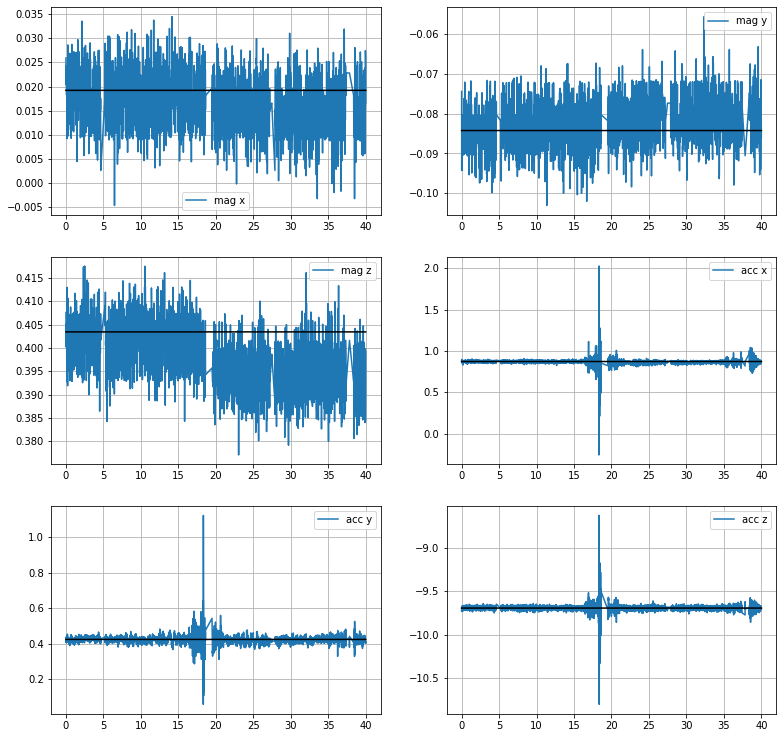

In [9]:
figure(figsize=(13,13))
gcf().add_subplot(321)
plot(data_begin.t,data_begin['mag_x'],label="mag x")
plot(data_begin.t,mag0[0]*ones(len(data_begin)),color="black")

grid()
legend()
gcf().add_subplot(322)
plot(data_begin.t,data_begin['mag_y'],label="mag y")
plot(data_begin.t,mag0[1]*ones(len(data_begin)),color="black")

grid()
legend()
gcf().add_subplot(323)
plot(data_begin.t,data_begin['mag_z'],label="mag z")
plot(data_begin.t,mag0[2]*ones(len(data_begin)),color="black")

grid()
legend()
gcf().add_subplot(324)
plot(data_begin.t,data_begin['accelero_x'],label="acc x")
plot(data_begin.t,acc0[0]*ones(len(data_begin)),color="black")
grid()
legend()
gcf().add_subplot(325)
plot(data_begin.t,data_begin['accelero_y'],label="acc y")
plot(data_begin.t,acc0[1]*ones(len(data_begin)),color="black")
grid()
legend()
gcf().add_subplot(326)
plot(data_begin.t,data_begin['accelero_z'],label="acc z")
plot(data_begin.t,acc0[2]*ones(len(data_begin)),color="black")

grid()
legend()

In [10]:
data.keys()

Index(['t', 'roll', 'pitch', 'yaw', 'R', 'manual_x', 'manual_y', 'manual_z',
       'manual_r', 'rc_0', 'rc_1', 'rc_2', 'rc_3', 'rc_4', 'rc_5', 'rc_6',
       'rc_7', 'ax_iner', 'ay_iner', 'az_iner', 'vx_iner', 'vy_iner',
       'vz_iner', 'x_iner', 'y_iner', 'z_iner', 'v_gps_north', 'v_gps_east',
       'v_gps_down', 'alt', 'gyro_x', 'gyro_y', 'gyro_z', 'accelero_x',
       'accelero_y', 'accelero_z', 'airspeed_mes', 'baro', 'mag_x', 'mag_y',
       'mag_z', 'init_timestamp', 'dt'],
      dtype='object')

# Testing reconstruction 

In [11]:

# def compute_error_acc(R,acc,a0=acc0,vdot=zeros(3)):
#     return cross(acc,((R.T)@((vdot+a0).T)).T)/norm(a0+vdot)**2
    
# def compute_error_mag(R,mag,m0=mag0):
#     return cross(mag,((R.T)@(m0.T)).T)/norm(m0)**2

# def predict_new_R(R,omega,acc,mag,dt,ka=0.2,km=0.2,accel0=acc0,magn0=mag0,vdot=zeros(3),ff=False):
    
#     # Computing errors
    
#     if not ff:
#         e_mag=skew(compute_error_mag(R,mag,m0=magn0))
#         e_acc=skew(compute_error_acc(R,acc,a0=accel0,vdot=vdot))
    
#     q=mat2quat(R)
#     q_omega=r_[0,omega]
    
#     dqdt=0.5*qmult(q,q_omega)
    
#     new_q=q+dt*dqdt
    
#     new_R=quat2mat(new_q)
    
#     if ff:
#         e_mag=skew(compute_error_mag(new_R,mag,m0=magn0))
#         e_acc=skew(compute_error_acc(new_R,acc,a0=accel0,vdot=vdot))
    
#     new_R=new_R@(eye(3)+dt*e_mag*km+dt*e_acc*ka)
    
#     new_R=orthonormalize(new_R)
#     return new_R
    
# def reconstruct_R(acc,mag,a0=acc0,m0=mag0):
#     B0=orthonormalize(array([a0,m0,cross(a0,m0)]).T)
#     B=orthonormalize(array([acc,mag,cross(acc,mag)]).T)
#     return B0@(B.T)

# R0=eye(3)
# q0=array([1.0,0.0,0.0,0.0])


# R_list=[R0]
# q_list=[q0]
# R_rec_list=[R0]
# q_real_list=[q0]
# R_real_list=[R0]

# q_iter_list,R_iter_list=[q0],[R0]
# q_iter_ff_list,R_iter_ff_list=[q0],[R0]
# q_dyn_reco_list,R_dyn_reco_list=[q0],[R0]


# x0=array([1.0,0.0,0.0])
# y0=array([0.0,1.0,0.0])
# t=0
# N=1000
# for n in range(N):

#     dt=0.01
#     t+=dt

#     omx=3*sin(2*pi*3*t)
#     omy=3*sin(2*pi*2*t)
#     omz=2*sin(2*pi*5*t)
    
#     omega=array([omx,omy,omz])
#     q_omega=r_[0,omega]
    
#     q_real=q_real_list[-1]
    
#     dqdt_real=0.5*qmult(q_real,q_omega)
    
#     new_q_real=q_real+dt*dqdt_real
    
#     new_R_real=quat2mat(new_q_real)
#     new_R_real=orthonormalize(new_R_real)
#     new_q_real=mat2quat(new_R_real)
    
#     q_real_list.append(new_q_real)
#     R_real_list.append(new_R_real)
    
#     x_mes=(new_R_real.T)@(x0.T)
#     x_mes=x_mes.flatten()
#     y_mes=(new_R_real.T)@(y0.T)
#     y_mes=y_mes.flatten()
    
    
#     R_reco=reconstruct_R(x_mes,y_mes,a0=x0,m0=y0)
#     R_list.append(R_reco)
#     q_list.append(mat2quat(R_reco))
    
#     R_iter_list.append(predict_new_R(R_iter_list[-1],omega*0,x_mes,y_mes,dt,accel0=x0,magn0=y0,ka=30.0,km=30.0))
#     q_iter_list.append(mat2quat(R_iter_list[-1]))
    
#     R_iter_ff_list.append(predict_new_R(R_iter_ff_list[-1],omega*0,x_mes,y_mes,dt,accel0=x0,magn0=y0,ka=30.0,km=30.0,ff=True))
#     q_iter_ff_list.append(mat2quat(R_iter_ff_list[-1]))
    
# q_real_list=vstack(q_real_list)
# R_real_list=vstack(R_real_list)

# R_list=vstack(R_list)
# q_list=vstack(q_list)

# R_iter_list=vstack(R_iter_list)
# q_iter_list=vstack(q_iter_list)

# R_iter_ff_list=vstack(R_iter_ff_list)
# q_iter_ff_list=vstack(q_iter_ff_list)

In [12]:
# figure(figsize=(15,15))
# gcf().add_subplot(511)
# # gca().plot(arange(N+1),q_list[:,0],label="reco")
# # gca().plot(arange(N+1),q_real_list[:,0],linestyle="--",label="real")
# gca().plot(arange(N+1),q_iter_list[:,0],label="iter")
# gca().plot(arange(N+1),q_iter_ff_list[:,0],label="ff")
# legend()
# grid()

# gcf().add_subplot(512)
# # gca().plot(arange(N+1),q_list[:,1],label="reco")
# # gca().plot(arange(N+1),q_real_list[:,1],linestyle="--",label="real")
# gca().plot(arange(N+1),q_iter_list[:,1],label="iter")
# gca().plot(arange(N+1),q_iter_ff_list[:,1],label="ff")
# legend()
# grid()

# gcf().add_subplot(513)
# # gca().plot(arange(N+1),q_list[:,2],label="reco")
# # gca().plot(arange(N+1),q_real_list[:,2],linestyle="--",label="real")
# gca().plot(arange(N+1),q_iter_list[:,2],label="iter")
# gca().plot(arange(N+1),q_iter_ff_list[:,2],label="ff")
# legend()
# grid()

# gcf().add_subplot(514)
# # gca().plot(arange(N+1),q_list[:,3],label="reco")
# # gca().plot(arange(N+1),q_real_list[:,3],linestyle="--",label="real")
# gca().plot(arange(N+1),q_iter_list[:,3],label="iter")
# gca().plot(arange(N+1),q_iter_ff_list[:,3],label="ff")
# legend()
# grid()

# gcf().add_subplot(515)
# # gca().plot(arange(N+1),[norm(i) for i in q_list],label="reco")
# # gca().plot(arange(N+1),[norm(i) for i in q_real_list],linestyle="--",label="real")
# gca().plot(arange(N+1),[norm(i) for i in q_iter_list],label="iter")
# gca().plot(arange(N+1),[norm(i) for i in q_iter_ff_list],label="ff")
# legend()
# grid()


# On real data

In [13]:
data.keys()

Index(['t', 'roll', 'pitch', 'yaw', 'R', 'manual_x', 'manual_y', 'manual_z',
       'manual_r', 'rc_0', 'rc_1', 'rc_2', 'rc_3', 'rc_4', 'rc_5', 'rc_6',
       'rc_7', 'ax_iner', 'ay_iner', 'az_iner', 'vx_iner', 'vy_iner',
       'vz_iner', 'x_iner', 'y_iner', 'z_iner', 'v_gps_north', 'v_gps_east',
       'v_gps_down', 'alt', 'gyro_x', 'gyro_y', 'gyro_z', 'accelero_x',
       'accelero_y', 'accelero_z', 'airspeed_mes', 'baro', 'mag_x', 'mag_y',
       'mag_z', 'init_timestamp', 'dt'],
      dtype='object')

In [14]:
" Estimated state is: "

" Speed (N=3)"
" Quaternion (N=4)"
" Accelero bias (N=3)"
" Gyro bias (N=3)"
" Magnetometer bias (N=3)"

k_gps=1.0
k_quat_acc=0.5
k_quat_mag=0.0
k_quat_speed=0.5
k_acc_bias=0.00
k_gyro_bias=0.0
k_mag_bias=0.00

kom=0.0

def compute_error_acc(R,acc,a0=acc0,vdot=zeros(3)):
    return skew(cross(acc,((R.T)@((vdot+a0).T)).T)/norm(a0+vdot)*norm(acc))
    
def compute_error_mag(R,mag,m0=mag0):
    return skew(cross(mag,((R.T)@(m0.T)).T)/norm(mag)**2)

def compute_error_rotspeed(R,speed,axis=array([1.0,0.0,0.0])):
    return skew(cross(axis,((R.T)@(speed.T)).T)/max(norm(speed),0.1))

def predict_new_R_and_omega(R,omega,acc,mag,dt,
                            ka=k_quat_acc,
                            km=k_quat_mag,
                            kx=k_quat_speed,
                            komega=kom,
                            accel0=acc0,
                            magn0=mag0,
                            vel=zeros(3),
                            vdot=zeros(3),
                            omega_bias=zeros(3),
                            acc_bias=zeros(3),
                            mag_bias=zeros(3),
                            ff=False):
    
    # Computing errors
    
    if not ff:
        e_mag=compute_error_mag(R,mag-mag_bias,m0=magn0)
        e_acc=compute_error_acc(R,acc-acc_bias,a0=accel0,vdot=vdot)
        e_speed=compute_error_rotspeed(R,vel)
    
    q=mat2quat(R)
    q_omega=kom*r_[0,omega-omega_bias]
    
    dqdt=0.5*qmult(q,q_omega)
    
    new_q=q+dt*dqdt
    
    new_R=quat2mat(new_q)
    
    if ff:
        e_mag=compute_error_mag(new_R,mag-mag_bias,m0=magn0)
        e_acc=compute_error_acc(new_R,acc-acc_bias,a0=accel0,vdot=vdot)
        e_speed=compute_error_rotspeed(R,vel)

    new_R=new_R@(eye(3)+dt*e_mag*km+dt*e_acc*ka+e_speed*kx)
    
    new_R=orthonormalize(new_R)
    
    new_omega=kom*(omega-omega_bias)+vect(e_mag*km+dt*e_acc*ka+e_speed*kx)
    return new_R,new_omega

def compute_estimator_step(estimator,dt,mes,a0=acc0,m0=mag0):
    
    current_acc=estimator['acc']
    current_speed=estimator['speed']
    current_quat=estimator['quat']
    current_acc_bias=estimator['acc_bias']
    current_gyro_bias=estimator['gyro_bias']
    current_mag_bias=estimator['mag_bias']
    
    gps_speed_mes=mes['gps']
    gyro_mes=mes['gyro']
    acc_mes=mes['acc']
    mag_mes=mes['mag']

    "speed prediction"
    pred_acc=-k_gps*(current_speed-gps_speed_mes)
    pred_speed=current_speed+dt*pred_acc
    
    "quat prediction"
    omega=gyro_mes-current_gyro_bias
    
    pred_R,pred_omega=predict_new_R_and_omega(quat2mat(current_quat),omega,acc_mes,mag_mes,dt,vel=pred_speed,vdot=pred_acc)
    pred_quat=mat2quat(pred_R)
    
    
    "bias update"
    
    prec_accelero=((pred_R.T)@(current_acc.reshape((3,1))+a0.reshape((3,1)))).flatten()+current_acc_bias
    pred_acc_bias=current_acc_bias+dt*k_acc_bias*(mes['acc']-prec_accelero)
    
    pred_gyro_bias=current_gyro_bias+dt*k_gyro_bias*(gyro_mes-pred_omega)
    
    
    pred_mag=((pred_R.T)@(m0.T)).flatten()+current_mag_bias
    
    pred_mag_bias=current_mag_bias+dt*k_mag_bias*(mag_mes-pred_mag)
    
    
    pred={}
    pred['acc']=pred_acc
    pred['speed']=pred_speed
    pred['omega']=pred_omega
    pred['quat']=pred_quat
    pred['acc_bias']=pred_acc_bias
    pred['gyro_bias']=pred_gyro_bias
    pred['mag_bias']=pred_mag_bias
    
    return pred

def compute_measurements_predictions(estimator,a0=acc0,m0=mag0):
    
    R=quat2mat(estimator['quat'])
    predicted_mes={}
    
    
    pred_gps=estimator['speed']
    
    pred_gyro=estimator['omega']+estimator['gyro_bias']
    
    prec_accelero=((R.T)@(estimator['acc'].reshape((3,1))+a0.reshape((3,1)))).flatten()+estimator['acc_bias']
    
    pred_mag=((R.T)@(m0.T)).flatten()+estimator['mag_bias']
    
    pred_axial_speed=(R.T@(estimator['speed'].reshape((3,1)))).flatten()
    pred_axial_speed/=max(0.1,norm(estimator['speed']))
                
    predicted_mes['gps']=pred_gps
    predicted_mes['gyro']=pred_gyro
    predicted_mes['accelero']=prec_accelero
    predicted_mes['mag']=pred_mag
    predicted_mes['axspeed']=pred_axial_speed
    return predicted_mes



In [15]:
" Estimation loop "
acc_init=zeros(3)
speed_init=zeros(3)
omega_init=zeros(3)
quat_init=array([1.0,0.0,0.0,0.0])
acc_bias_init=zeros(3)
gyro_bias_init=zeros(3)
mag_bias_init=zeros(3)

estimator_list=[[acc_init,speed_init,omega_init,quat_init,acc_bias_init,gyro_bias_init,mag_bias_init]]
    

pred_mes_gps=array([data['v_gps_north'][0], data['v_gps_east'][0],data['v_gps_down'][0]])
pred_mes_gyro=array([data['gyro_x'][0], data['gyro_y'][0],data['gyro_z'][0]])
pred_mes_acc=array([data['accelero_x'][0], data['accelero_y'][0],data['accelero_z'][0]])
pred_mes_mag=array([data['mag_x'][0], data['mag_y'][0],data['mag_z'][0]])
pred_mes_body_speed=zeros(3)
pred_mes_list=[[pred_mes_gps,pred_mes_gyro,pred_mes_acc,pred_mes_mag,pred_mes_body_speed]]



for n in range(len(data)-1):
    if n%1000==0:
        print(n,"/",len(data))
        
        
#     """"TEST REMOVE BEFORE REALUSE"""
#     if n>1e4:
#         print('TEST REMOVE BEFORE REALUSE') 
#         break
        
    dt=data['dt'][n]

    "building estimator dict"
    estimator_dict={}
    
    estimator_dict['acc']=estimator_list[-1][0]
    estimator_dict['speed']=estimator_list[-1][1]
    estimator_dict['omega']=estimator_list[-1][2]
    estimator_dict['quat']=estimator_list[-1][3]
    estimator_dict['acc_bias']=estimator_list[-1][4]
    estimator_dict['gyro_bias']=estimator_list[-1][5]
    estimator_dict['mag_bias']=estimator_list[-1][6]
    
    "building mes dict"

    mes_dict={}
    mes_gps=array([data['v_gps_north'][n], data['v_gps_east'][n],data['v_gps_down'][n]])
    mes_dict['gps']=mes_gps
    
    mes_gyro=array([data['gyro_x'][n], data['gyro_y'][n],data['gyro_z'][n]])
    mes_dict['gyro']=mes_gyro

    mes_acc=array([data['accelero_x'][n], data['accelero_y'][n],data['accelero_z'][n]])
    mes_dict['acc']=mes_acc
    
    mes_mag=array([data['mag_x'][n], data['mag_y'][n],data['mag_z'][n]])
    mes_dict['mag']=mes_mag
    
    
    "prediction"
    
    new_estimator_dict=compute_estimator_step(estimator_dict,dt,mes_dict)
    
    estimator_list.append([new_estimator_dict[i] for i in new_estimator_dict.keys()])
    
    " computing predicted measurements "
    
    new_pred_mes_dict=compute_measurements_predictions(new_estimator_dict)
    pred_mes_list.append([new_pred_mes_dict[i] for i in new_pred_mes_dict.keys()])
    

0 / 61760
1000 / 61760
2000 / 61760
3000 / 61760
4000 / 61760
5000 / 61760
6000 / 61760
7000 / 61760
8000 / 61760
9000 / 61760
10000 / 61760
11000 / 61760
12000 / 61760
13000 / 61760
14000 / 61760
15000 / 61760
16000 / 61760
17000 / 61760
18000 / 61760
19000 / 61760
20000 / 61760
21000 / 61760
22000 / 61760
23000 / 61760
24000 / 61760
25000 / 61760
26000 / 61760
27000 / 61760
28000 / 61760
29000 / 61760
30000 / 61760
31000 / 61760
32000 / 61760
33000 / 61760
34000 / 61760
35000 / 61760
36000 / 61760
37000 / 61760
38000 / 61760
39000 / 61760
40000 / 61760
41000 / 61760
42000 / 61760
43000 / 61760
44000 / 61760
45000 / 61760
46000 / 61760
47000 / 61760
48000 / 61760
49000 / 61760
50000 / 61760
51000 / 61760
52000 / 61760
53000 / 61760
54000 / 61760
55000 / 61760
56000 / 61760
57000 / 61760
58000 / 61760
59000 / 61760
60000 / 61760
61000 / 61760


In [16]:
estimator_array=array(array([i for i in estimator_list]))
pred_mes_array=array(array([i for i in pred_mes_list]))

In [17]:
estimator_array.shape

(61760, 7)

In [18]:
pred_mes_array.shape

(61760, 5, 3)

In [19]:
estim={}
for i,key in enumerate(new_estimator_dict.keys()):
    estim[key]=vstack(estimator_array[:,i,...])
    
pred_mes={}
for i,key in enumerate(new_pred_mes_dict.keys()):
    pred_mes[key]=vstack(pred_mes_array[:,i,...])
    


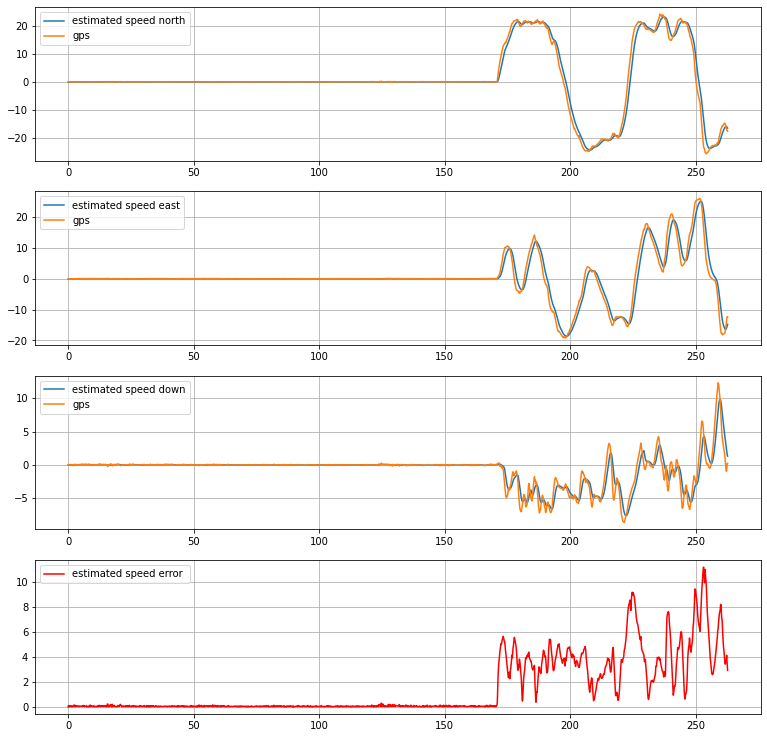

In [20]:
figure(figsize=(13,13))

gcf().add_subplot(411)
plot(data.t,pred_mes['gps'][:,0],label="estimated speed north")
plot(data.t,data['v_gps_north'],label="gps")
legend()
grid()

gcf().add_subplot(412)
plot(data.t,pred_mes['gps'][:,1],label="estimated speed east")
plot(data.t,data['v_gps_east'],label="gps")
legend()
grid()

gcf().add_subplot(413)
plot(data.t,pred_mes['gps'][:,2],label="estimated speed down")
plot(data.t,data['v_gps_down'],label="gps")
legend()
grid()

error_speed=(pred_mes['gps'][:,0]-data['v_gps_north'])**2
error_speed+=(pred_mes['gps'][:,1]-data['v_gps_east'])**2
error_speed+=(pred_mes['gps'][:,2]-data['v_gps_down'])**2
error_speed=sqrt(error_speed)

gcf().add_subplot(414)
plot(data.t,error_speed,color='red',label="estimated speed error ")
legend()
grid()

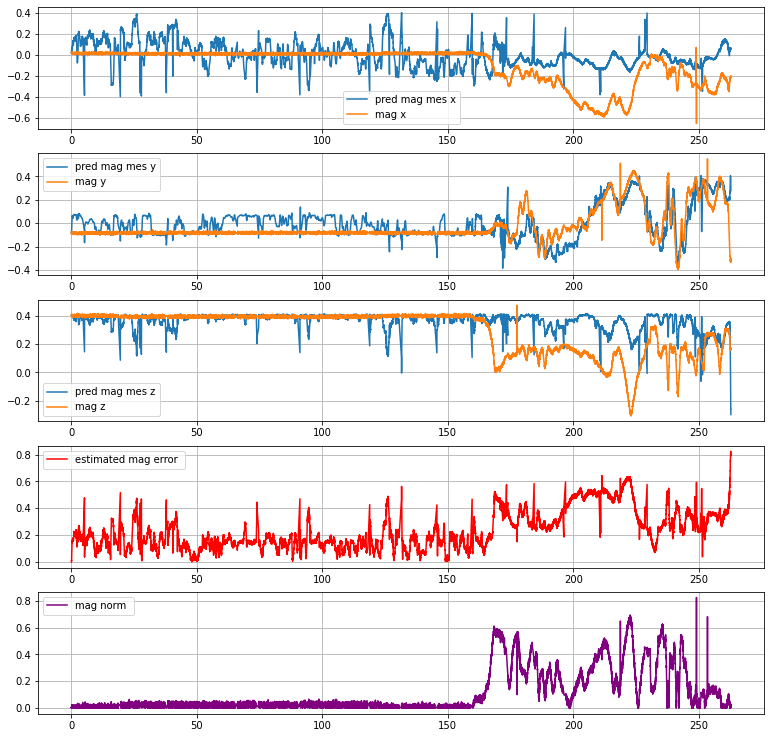

In [21]:
figure(figsize=(13,13))

gcf().add_subplot(511)
plot(data.t,pred_mes['mag'][:,0],label="pred mag mes x")
plot(data.t,data['mag_x'],label="mag x")
legend()
grid()

gcf().add_subplot(512)
plot(data.t,pred_mes['mag'][:,1],label="pred mag mes y")
plot(data.t,data['mag_y'],label="mag y")
legend()
grid()

gcf().add_subplot(513)
plot(data.t,pred_mes['mag'][:,2],label="pred mag mes z")
plot(data.t,data['mag_z'],label="mag z")
legend()
grid()


error_mag=(pred_mes['mag'][:,0]-data['mag_x'])**2
error_mag+=(pred_mes['mag'][:,1]-data['mag_y'])**2
error_mag+=(pred_mes['mag'][:,2]-data['mag_z'])**2
error_mag=sqrt(error_mag)

norm_mag=abs(1-sqrt(data['mag_x']**2+data['mag_y']**2+data['mag_z']**2)/norm(mag0))

gcf().add_subplot(514)
plot(data.t,error_mag,color='red',label="estimated mag error ")
legend()
grid()

gcf().add_subplot(515)
plot(data.t,norm_mag,color='purple',label="mag norm ")
legend()
grid()

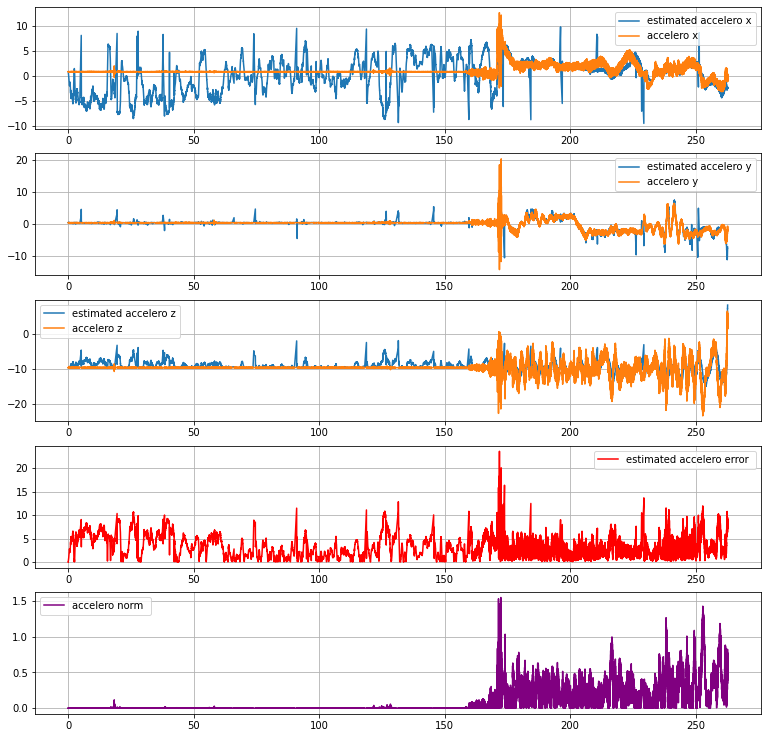

In [22]:
figure(figsize=(13,13))

gcf().add_subplot(511)
plot(data.t,pred_mes['accelero'][:,0],label="estimated accelero x")
plot(data.t,data['accelero_x'],label="accelero x")
legend()
grid()

gcf().add_subplot(512)
plot(data.t,pred_mes['accelero'][:,1],label="estimated accelero y")
plot(data.t,data['accelero_y'],label="accelero y")
legend()
grid()

gcf().add_subplot(513)
plot(data.t,pred_mes['accelero'][:,2],label="estimated accelero z")
plot(data.t,data['accelero_z'],label="accelero z")
legend()
grid()


error_acc=(pred_mes['accelero'][:,0]-data['accelero_x'])**2
error_acc+=(pred_mes['accelero'][:,1]-data['accelero_y'])**2
error_acc+=(pred_mes['accelero'][:,2]-data['accelero_z'])**2
error_acc=sqrt(error_acc)

norm_acc=abs(1-sqrt(data['accelero_x']**2+data['accelero_y']**2+data['accelero_z']**2)/norm(acc0))

gcf().add_subplot(514)
plot(data.t,error_acc,color='red',label="estimated accelero error ")
legend()
grid()

gcf().add_subplot(515)
plot(data.t,norm_acc,color='purple',label="accelero norm ")
legend()
grid()

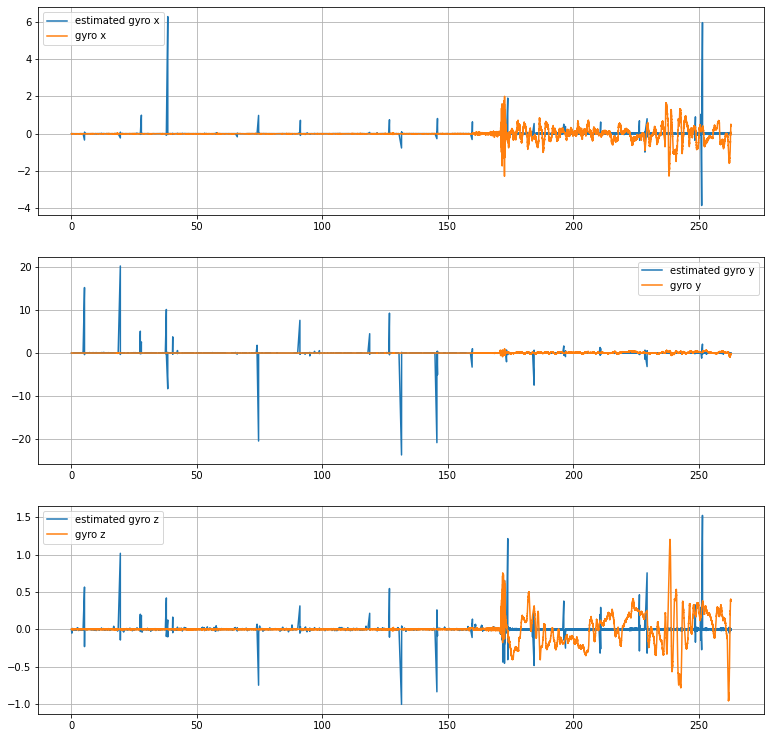

In [23]:
figure(figsize=(13,13))

gcf().add_subplot(311)
plot(data.t,pred_mes['gyro'][:,0],label="estimated gyro x")
plot(data.t,data['gyro_x'],label="gyro x")
legend()
grid()

gcf().add_subplot(312)
plot(data.t,pred_mes['gyro'][:,1],label="estimated gyro y")
plot(data.t,data['gyro_y'],label="gyro y")
legend()
grid()

gcf().add_subplot(313)
plot(data.t,pred_mes['gyro'][:,2],label="estimated gyro z")
plot(data.t,data['gyro_z'],label="gyro z")
legend()
grid()

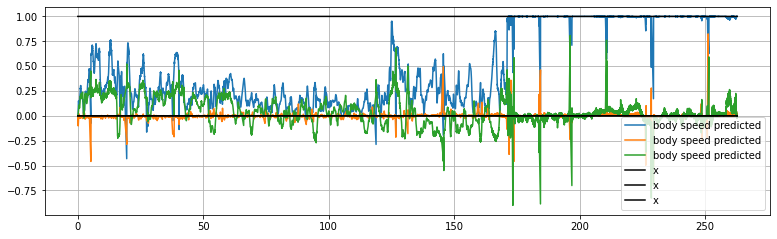

In [24]:
figure(figsize=(13,13))

gcf().add_subplot(311)
plot(data.t,pred_mes['axspeed'],label="body speed predicted")
plot(data.t,[array([1.0,0.0,0.0]) for i in range(len(data))],label="x",color="black")
legend()
grid()